In [4]:
!pip install matplotlib
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 4.2 MB/s eta 0:00:00a 0:00:01


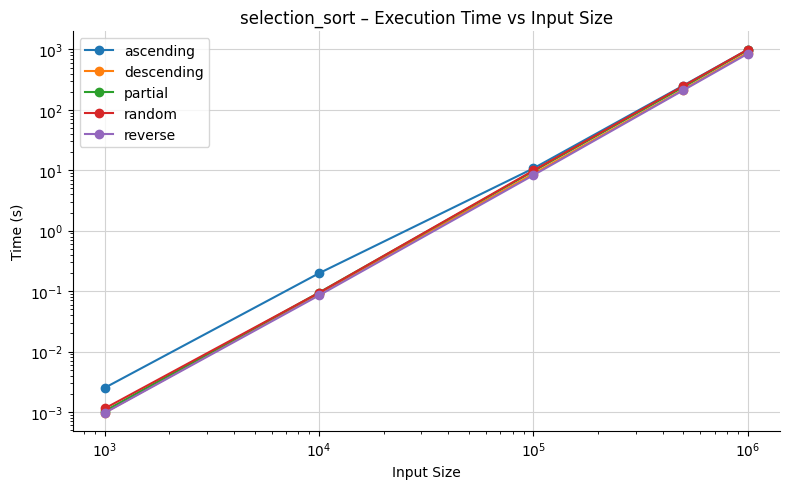

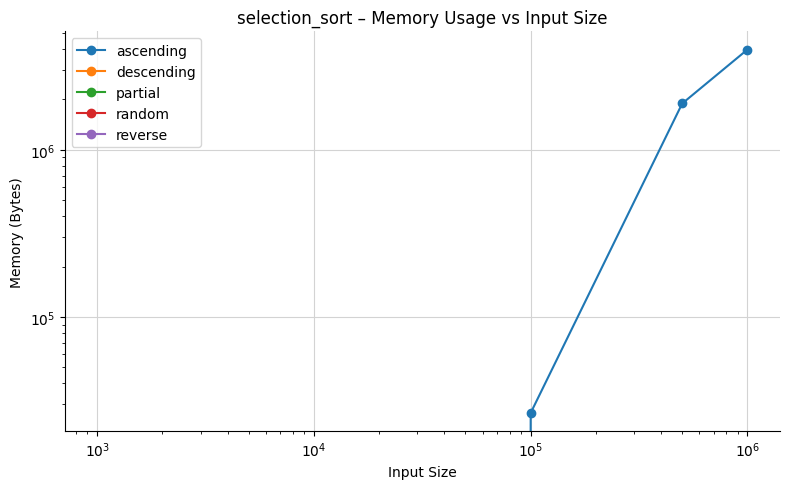

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# seaborn-whitegrid 스타일을 수동으로 흉내낸 설정
plt.rcParams.update({
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': True,
    'grid.color': 'lightgray',
    'grid.linestyle': '-',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'font.family': 'DejaVu Sans',
    'figure.figsize': (8, 5)
})

# CSV 파일 경로
csv_path = 'analysis_result_tim_sort.csv'  # ← 여기에 CSV 파일 경로 입력

# 데이터 불러오기
df = pd.read_csv(csv_path)

# 입력 크기 정렬을 위해 숫자형 변환
df['Size'] = df['Size'].astype(int)

# 고유 알고리즘 및 패턴 목록 추출
algorithms = df['Algorithm'].unique()
patterns = df['Pattern'].unique()

# 알고리즘별로 시각화
for algo in algorithms:
    algo_df = df[df['Algorithm'] == algo].sort_values('Size')

    # Execution Time vs Input Size
    plt.figure()
    for pattern in patterns:
        subset = algo_df[algo_df['Pattern'] == pattern]
        plt.plot(subset['Size'], subset['AverageTime(s)'], marker='o', label=pattern)
    plt.title(f'{algo} – Execution Time vs Input Size')
    plt.xlabel('Input Size')
    plt.ylabel('Time (s)')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Memory Usage vs Input Size
    plt.figure()
    for pattern in patterns:
        subset = algo_df[algo_df['Pattern'] == pattern]
        plt.plot(subset['Size'], subset['AverageMemory(B)'], marker='o', label=pattern)
    plt.title(f'{algo} – Memory Usage vs Input Size')
    plt.xlabel('Input Size')
    plt.ylabel('Memory (Bytes)')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.show()
